In [2]:
# Dataset - https://drive.google.com/drive/folders/1YujA_GjKigwSJXbRJTkO1l2p1gMmm8ai

In [3]:
with open('SMSSpamCollection', 'r') as f:
  spam_data = f.readlines()

In [4]:
spam_data

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'ham\tOk lar... Joking wif u oni...\n',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'ham\tU dun say so early hor... U c already then say...\n',
 "ham\tNah I don't think he goes to usf, he lives around here though\n",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv\n",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.\n',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim ca

#### Create a dataframe with features as ham and spam and sentences

In [5]:
pip install "numpy<2"

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np

In [7]:
# Can also use line.strip().split('\t)
import pandas as pd
data = []
for line in spam_data:
  label , text = line.split('\t')
  data.append([label,text])
df= pd.DataFrame(data,columns = ['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?\n
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [8]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?\n
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [9]:
df = pd.read_csv('SMSSpamCollection',sep = '\t', names=['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### Seperate the input and output variables

In [10]:
# input data
x = df['text']

# output data
y = df['label']

#### Explore the data

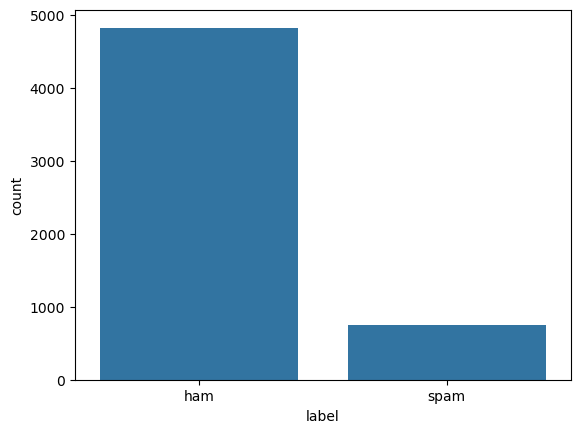

In [11]:
import seaborn as sns
sns.countplot(x=y);

In [12]:
# The values are not balanced
df.shape

(5572, 2)

In [13]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

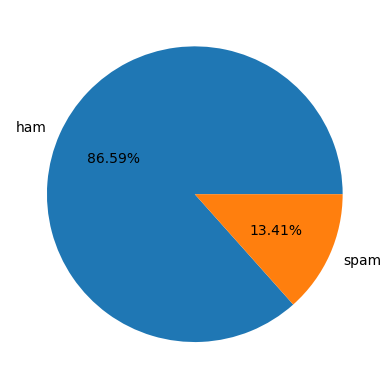

In [14]:
import matplotlib.pyplot as plt
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

In [15]:
!pip install wordcloud pillow -U

In [16]:
# Separate ham, spam
ham = x[y=='ham']
spam = x[y=='spam']

In [17]:
ham

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 4825, dtype: object

In [18]:
hams = ' '.join(ham)
spams = ' '.join(spam)

In [19]:
hams

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that\x92s the way u feel. That\x92s th

In [20]:
len(spams), len(hams)

(104333, 349727)

In [21]:
from wordcloud import WordCloud

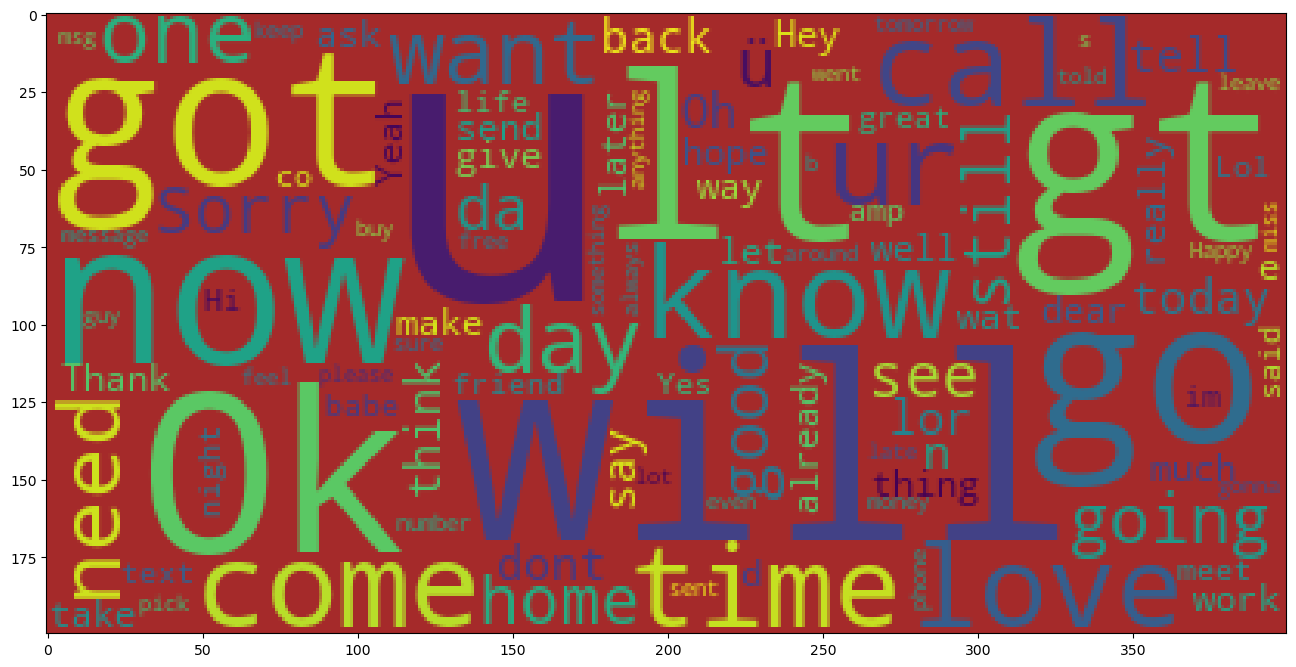

In [22]:
wc_notspam = WordCloud(background_color='brown',
                       max_words = 100).generate(hams)

plt.figure(figsize=(16,9))
plt.imshow(wc_notspam)

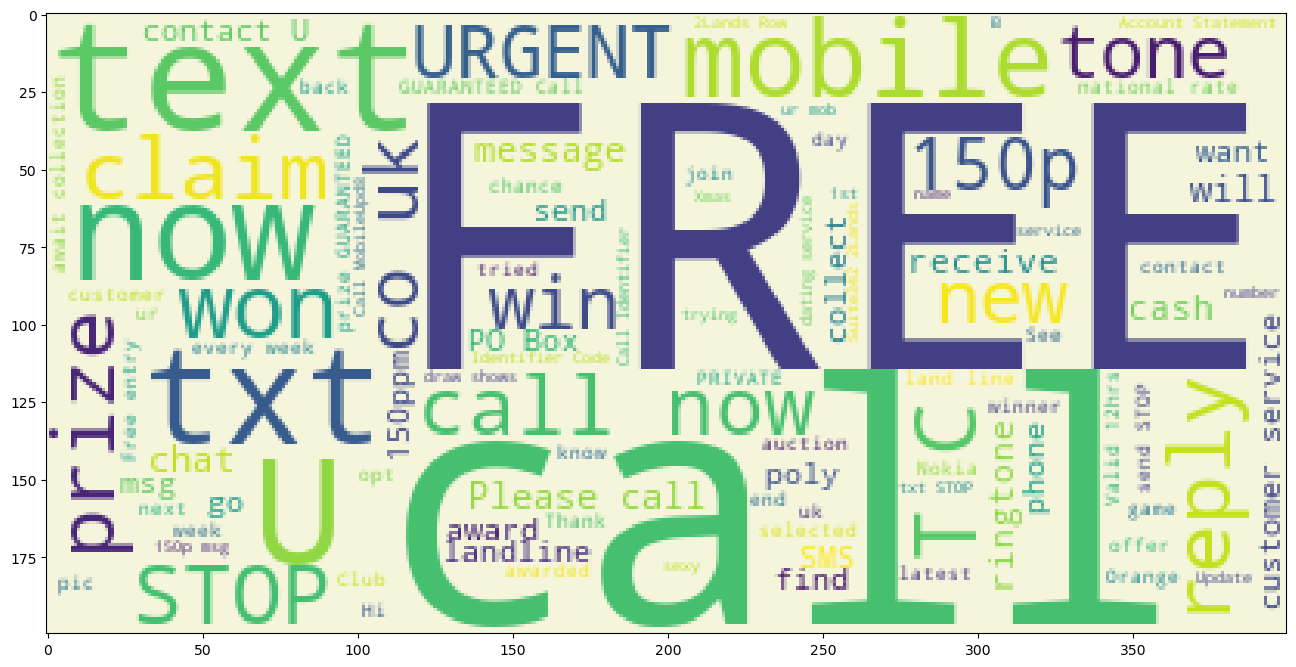

In [23]:
wc_spam = WordCloud(background_color='beige',
                       max_words = 100).generate(spams)

plt.figure(figsize=(16,9))
plt.imshow(wc_spam)

In [24]:
# Most frequent word is considered 1 and relation to that other words are given
wc_notspam.words_

{'u': 1.0,
 'will': 0.33096446700507615,
 'lt gt': 0.2802030456852792,
 'Ok': 0.2649746192893401,
 'now': 0.2578680203045685,
 'go': 0.25583756345177666,
 'got': 0.2365482233502538,
 'know': 0.2182741116751269,
 'come': 0.21116751269035533,
 'call': 0.20812182741116753,
 'love': 0.20609137055837565,
 'time': 0.20101522842639594,
 'ur': 0.19898477157360406,
 'day': 0.18883248730964466,
 'want': 0.18781725888324874,
 'one': 0.17766497461928935,
 'need': 0.17563451776649747,
 'going': 0.1715736040609137,
 'good': 0.166497461928934,
 'Sorry': 0.15939086294416244,
 'ü': 0.15634517766497463,
 'home': 0.15532994923857868,
 'still': 0.1532994923857868,
 'da': 0.14416243654822336,
 'see': 0.14213197969543148,
 'today': 0.1401015228426396,
 'think': 0.13401015228426397,
 'n': 0.132994923857868,
 'lor': 0.12791878172588833,
 'tell': 0.12690355329949238,
 'dont': 0.12284263959390863,
 'say': 0.12081218274111676,
 'back': 0.12081218274111676,
 'Oh': 0.11573604060913706,
 'thing': 0.1147208121827411

#### Data Preparation

1.tokenization
2.remove punctuation
3.remove stopwords
4.remove suffixes
5.remove one letter characters

In [25]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DAI.STUDENTSDC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DAI.STUDENTSDC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DAI.STUDENTSDC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [26]:
sent = 'Hello friends! How are you? I like Python Programming.'

In [27]:
tokens1 = word_tokenize(sent)

#### Remove the punctuations

In [28]:
tokens2 = [token for token in tokens1 if token.isalpha()]

In [29]:
tokens2

['Hello', 'friends', 'How', 'are', 'you', 'I', 'like', 'Python', 'Programming']

In [30]:
swords = stopwords.words('english')

#### Remove the stopwords

In [31]:
tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]

In [32]:
tokens3

['hello', 'friends', 'like', 'python', 'programming']

In [33]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

# remove the affixes
tokens4 = [ps.stem(token) for token in tokens3]

In [34]:
tokens4

['hello', 'friend', 'like', 'python', 'program']

#### Creating the combined function

In [35]:
def clean_text(text):
  # Tokenize the text
  tokens1 = word_tokenize(text)
  # Remove punctuations
  tokens2 = [token for token in tokens1 if token.isalpha()]
  swords = stopwords.words('english')
  # remove stopwords
  tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords ]
  ps = PorterStemmer()
  # remove the affixes
  tokens4 = [ps.stem(token) for token in tokens3]
  return tokens4

In [36]:
clean_text('Hello friends! How are you? I like Python Programming.')

['hello', 'friend', 'like', 'python', 'program']

In [37]:
sent1 = 'It was nice working with you. Have a great day!'

In [38]:
clean_text(sent1)

['nice', 'work', 'great', 'day']

In [39]:
x.apply(clean_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, contact, u, pound, prize, claim, e...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

#### Apply TF*IDF Vectorizer

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
# We passed the function here clean_text
tfidf = TfidfVectorizer(analyzer=clean_text)

In [42]:
x_new = tfidf.fit_transform(x)

In [43]:
x_new.shape

(5572, 5925)

In [44]:
tfidf.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zyada', 'é', 'ü'], dtype=object)

In [45]:
len(tfidf.get_feature_names_out())

5925

#### Cross Validation

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# default is 25% and 75% split ratio
X_train , X_test , y_train , y_test = train_test_split(x_new,y,random_state=0)

In [48]:
X_train.shape

(4179, 5925)

In [49]:
X_test.shape

(1393, 5925)

#### Build the SVM model

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

In [51]:
svm1 = SVC(kernel='linear')

In [52]:
svm1.fit(X_train,y_train)

SVC(kernel='linear')

In [53]:
y_pred = svm1.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred)

0.9827709978463748

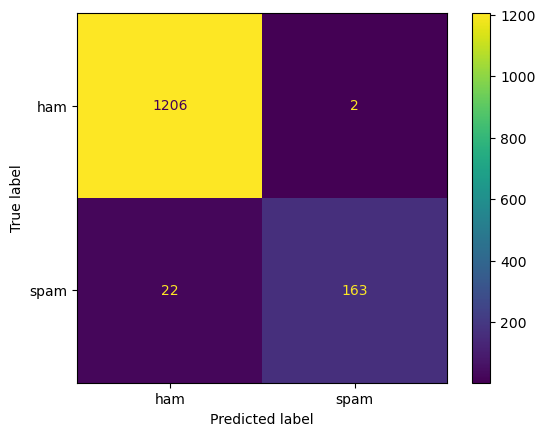

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [57]:
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test,y_pred)

0.9813352476669059

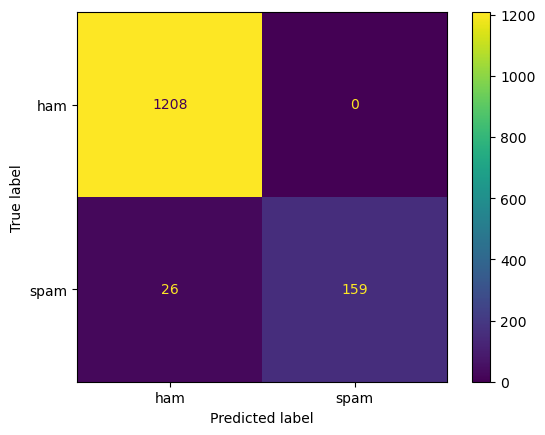

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [59]:
svm = SVC(kernel='poly')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test,y_pred)

0.949748743718593

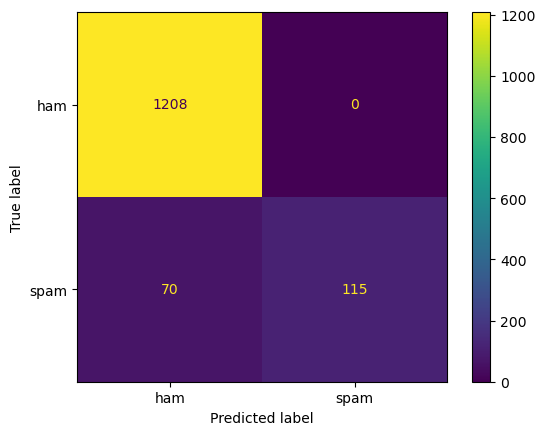

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [61]:
svm = SVC(kernel='sigmoid')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test,y_pred)

0.9798994974874372

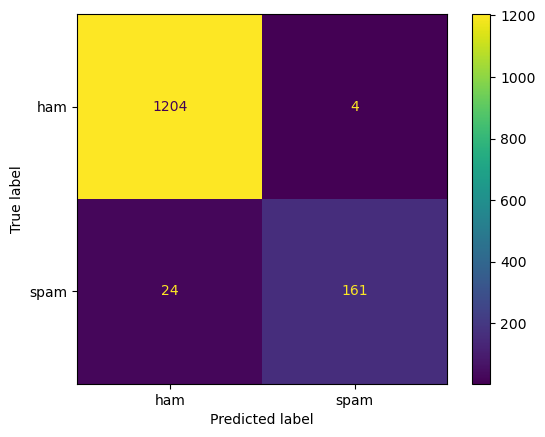

In [62]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

### Prediction on unknown messages

In [63]:
test = pd.read_csv('sample.csv',sep='\t',names=['text'])

In [64]:
pd.DataFrame(test)

,text
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [65]:
test_new = tfidf.transform(test['text'])

In [66]:
y_pred = svm1.predict(test_new)

In [67]:
test['label'] = y_pred

In [68]:
test

,text,label
0,Ok lar i double check wif da hair dresser alre...,ham
1,"As a valued customer, I am pleased to advise y...",spam
2,"Today is ""song dedicated day.."" Which song wil...",ham


OR

In [69]:
file = open('sample.csv')
lines = file.readlines()

In [70]:
svm1.predict(tfidf.transform(lines))

array(['ham', 'spam', 'ham'], dtype=object)

Serve the model

## Joblib
Joblib is commonly used to save and load large Python objects like scikit-learn models, numpy arrays, or dictionaries

In [71]:
import joblib

In [72]:
joblib.dump(svm1, 'classifier.model')

['classifier.model']

In [73]:
classifier = joblib.load('classifier.model')

In [74]:
classifier.predict(tfidf.transform(lines))

array(['ham', 'spam', 'ham'], dtype=object)

In [75]:
joblib.dump(tfidf, 'tfidf.model')

['tfidf.model']